<a href="https://colab.research.google.com/github/Ahella-Bassem-Mohammed/Stroke_Pre-Detection_Analysis/blob/main/The_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Member1 Role**



In [30]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings('ignore')

In [31]:
# Step 2: Load the dataset
file_path = "/content/healthcare-dataset-stroke-data.csv"
df = pd.read_csv(file_path)

In [32]:
# Step 3: Understand the dataset
# Display the first few rows of the dataset to understand its structure
print("First 5 rows of the dataset:")
print(df.head())

First 5 rows of the dataset:
      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1  


In [33]:
# Step 4: Remove irrelevant or inconsistent data
# Remove rows with gender 'Other' since it's not useful for analysis
df = df[df['gender'].isin(['Male', 'Female'])]

In [34]:
# Convert gender to numeric (Male = 0, Female = 1)
df['gender'] = df['gender'].map({'Male': 0, 'Female': 1})

In [35]:
print(df.head())

      id  gender   age  hypertension  heart_disease ever_married  \
0   9046       0  67.0             0              1          Yes   
1  51676       1  61.0             0              0          Yes   
2  31112       0  80.0             0              1          Yes   
3  60182       1  49.0             0              0          Yes   
4   1665       1  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1  


In [36]:
# Step 5: Handle missing values
# Display the number of missing values in each column
print("Missing values in each column:")
print(df.isnull().sum())

Missing values in each column:
id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


In [37]:
print(df['age'].isnull().sum())

0


In [38]:
# Fill missing age values with the mean
df['age'] = df['age'].fillna(df['age'].mean())

In [39]:
# Step 6: Handle outliers in the 'age' column
# Calculate IQR for 'age'
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [40]:
# Remove rows where 'age' is outside the acceptable range
df = df[(df['age'] >= lower_bound) & (df['age'] <= upper_bound)]

In [41]:
# Scale the 'age' column to a range of 0 to 1
age_scaler = MinMaxScaler()
df['age_scaled'] = age_scaler.fit_transform(df[['age']])

In [42]:
# Step 7: Process categorical columns
# Convert 'ever_married' to numeric (Yes = 1, No = 0)
df['ever_married'] = df['ever_married'].map({'Yes': 1, 'No': 0})

In [43]:
work_type_mapping = {
    'Private': 0,
    'Self-employed': 1,
    'Govt_job': 2,
    'children': 3,
    'Never_worked': 4
}

In [44]:
df['work_type'] = df['work_type'].map(work_type_mapping)

In [45]:
# Convert 'Residence_type' to numeric (Urban = 0, Rural = 1)
df['Residence_type'] = df['Residence_type'].map({'Urban': 0, 'Rural': 1})

In [46]:
# Step 8: Handle missing and outlier values for 'avg_glucose_level'
df['avg_glucose_level'] = df['avg_glucose_level'].fillna(df['avg_glucose_level'].mean())

In [47]:
# Calculate IQR for 'avg_glucose_level'
Q1 = df['avg_glucose_level'].quantile(0.25)
Q3 = df['avg_glucose_level'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [48]:
# Remove rows with outliers in 'avg_glucose_level'
df = df[(df['avg_glucose_level'] >= lower_bound) & (df['avg_glucose_level'] <= upper_bound)]

In [49]:
# Scale 'avg_glucose_level' to a range of 0 to 1
glucose_scaler = MinMaxScaler()
df['avg_glucose_level_scaled'] = glucose_scaler.fit_transform(df[['avg_glucose_level']])

In [50]:
# Step 9: Handle 'smoking_status' column
# Convert 'smoking_status' to numeric and check the percentage of 'Unknown'
df['smoking_status'] = df['smoking_status'].map({
    'never smoked': 0,
    'formerly smoked': 1,
    'smokes': 2,
    'Unknown': 3
})

In [51]:
# Step 10: Handle missing BMI values
# Split data into rows with and without BMI values
bmi_missing = df[df['bmi'].isnull()]
bmi_non_missing = df[df['bmi'].notnull()]

In [52]:
# Train a RandomForestRegressor to predict missing BMI values
model = RandomForestRegressor()
X_train = bmi_non_missing.drop(columns=['bmi'])
y_train = bmi_non_missing['bmi']
model.fit(X_train, y_train)

RandomForestRegressor()

In [53]:
# Predict missing BMI values
X_missing = bmi_missing.drop(columns=['bmi'])
df.loc[df['bmi'].isnull(), 'bmi'] = model.predict(X_missing)

In [54]:
# Scale the 'bmi' column to a range of 0 to 1
bmi_scaler = MinMaxScaler()
df['bmi_scaled'] = bmi_scaler.fit_transform(df[['bmi']])

In [55]:
# Step 11: Final dataset preview
print("Cleaned and processed dataset preview:")
print(df.head(100))

Cleaned and processed dataset preview:
        id  gender   age  hypertension  heart_disease  ever_married  \
2    31112       0  80.0             0              1             1   
6    53882       0  74.0             1              1             1   
7    10434       1  69.0             0              0             0   
8    27419       1  59.0             0              0             1   
9    60491       1  78.0             0              0             1   
..     ...     ...   ...           ...            ...           ...   
148  72081       1  57.0             1              0             1   
152  32503       1  80.0             0              0             1   
153  12482       0  68.0             0              0             1   
154  56939       1  55.0             0              0             1   
156  43054       1  50.0             0              0             1   

     work_type  Residence_type  avg_glucose_level     bmi  smoking_status  \
2            0               1 

# **Member2 Role**

In [56]:
# Step 1: Understanding the prepared data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
# Display the final dimensions of the data
print("Dataset Shape:", df.shape)
print("Number of Columns:", len(df.columns))

Dataset Shape: (4482, 15)
Number of Columns: 15


In [60]:
# Show the statistical description of the data
print("Dataset Description:")
print(df.describe())

Dataset Description:
                 id       gender          age  hypertension  heart_disease  \
count   4482.000000  4482.000000  4482.000000   4482.000000    4482.000000   
mean   36580.190763     0.594601    40.889639      0.074967       0.038599   
std    21184.237530     0.491024    22.391112      0.263367       0.192658   
min       67.000000     0.000000     0.080000      0.000000       0.000000   
25%    17873.000000     0.000000    23.000000      0.000000       0.000000   
50%    37018.000000     1.000000    42.000000      0.000000       0.000000   
75%    54812.500000     1.000000    58.000000      0.000000       0.000000   
max    72940.000000     1.000000    82.000000      1.000000       1.000000   

       ever_married    work_type  Residence_type  avg_glucose_level  \
count   4482.000000  4482.000000     4482.000000        4482.000000   
mean       0.624944     0.872378        0.492637          91.423498   
std        0.484191     1.151443        0.500002          22.62

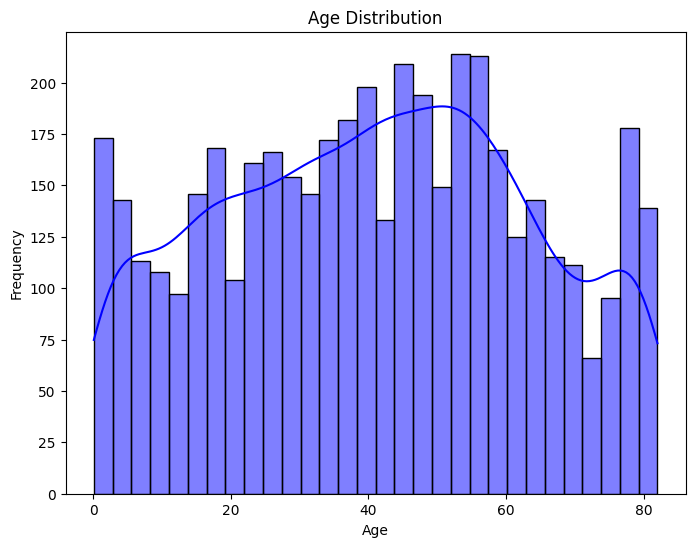

In [61]:
# Step 2: Analyzing distributions for each column
# Histogram: Distribution of numerical values (age, avg_glucose_level, bmi)
plt.figure(figsize=(8, 6))
sns.histplot(df['age'], kde=True, bins=30, color='blue')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

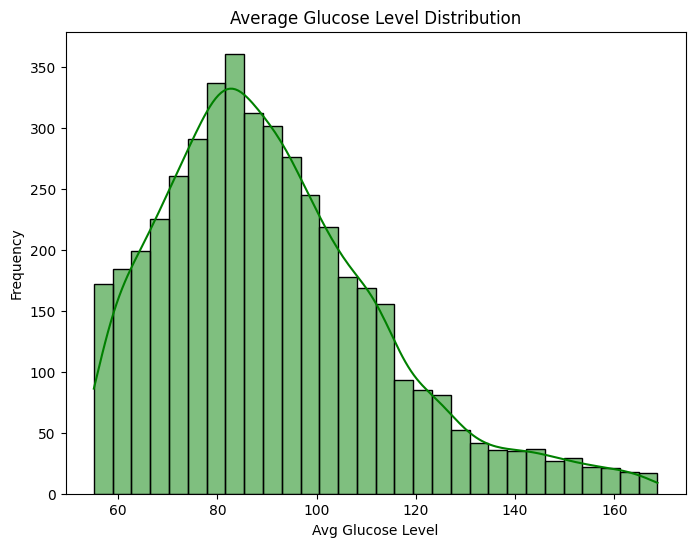

In [62]:
plt.figure(figsize=(8, 6))
sns.histplot(df['avg_glucose_level'], kde=True, bins=30, color='green')
plt.title("Average Glucose Level Distribution")
plt.xlabel("Avg Glucose Level")
plt.ylabel("Frequency")
plt.show()

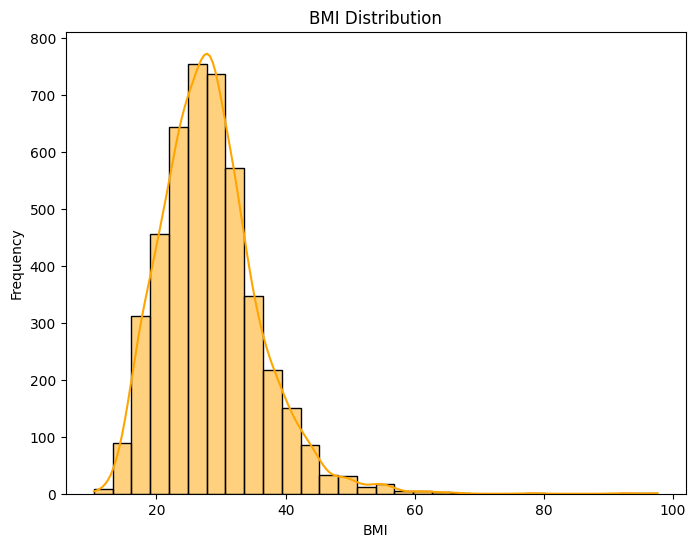

In [63]:
plt.figure(figsize=(8, 6))
sns.histplot(df['bmi'], kde=True, bins=30, color='orange')
plt.title("BMI Distribution")
plt.xlabel("BMI")
plt.ylabel("Frequency")
plt.show()

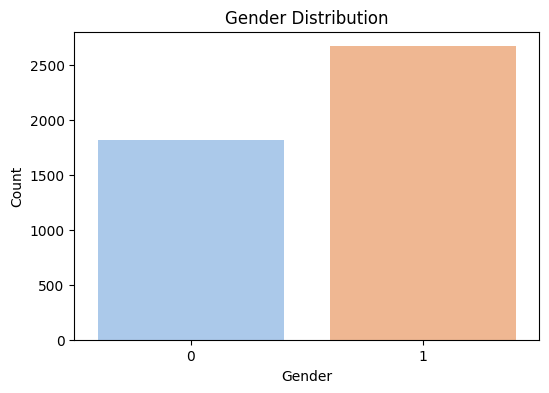

In [64]:
# Bar plot: Categorical columns (gender, marital status, smoking status)
plt.figure(figsize=(6, 4))
sns.countplot(x='gender', data=df, palette='pastel')
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

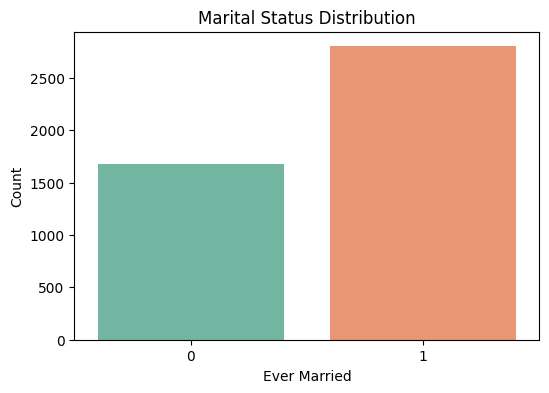

In [65]:
plt.figure(figsize=(6, 4))
sns.countplot(x='ever_married', data=df, palette='Set2')
plt.title("Marital Status Distribution")
plt.xlabel("Ever Married")
plt.ylabel("Count")
plt.show()

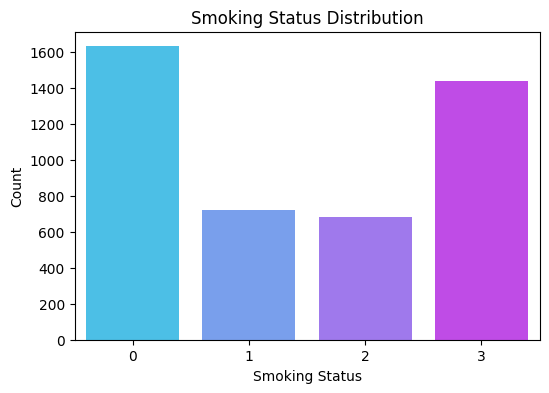

In [66]:
plt.figure(figsize=(6, 4))
sns.countplot(x='smoking_status', data=df, palette='cool')
plt.title("Smoking Status Distribution")
plt.xlabel("Smoking Status")
plt.ylabel("Count")
plt.show()

In [67]:
# Step 3: Correlation Analysis
# Correlation matrix
correlation_matrix = df.corr()
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                                id    gender       age  hypertension  \
id                        1.000000 -0.002665  0.013832      0.014733   
gender                   -0.002665  1.000000  0.046700     -0.020339   
age                       0.013832  0.046700  1.000000      0.248179   
hypertension              0.014733 -0.020339  0.248179      1.000000   
heart_disease             0.001020 -0.089327  0.238697      0.088100   
ever_married              0.022221  0.047424  0.682428      0.147036   
work_type                -0.017159 -0.073767 -0.430664     -0.072206   
Residence_type           -0.003978 -0.003525 -0.011077      0.009277   
avg_glucose_level         0.022371 -0.030601 -0.022195      0.001295   
bmi                       0.012423  0.027060  0.326537      0.158542   
smoking_status           -0.016551 -0.084681 -0.301594     -0.103264   
stroke                    0.000870 -0.000263  0.226166      0.110823   
age_scaled                0.013832  0.046700

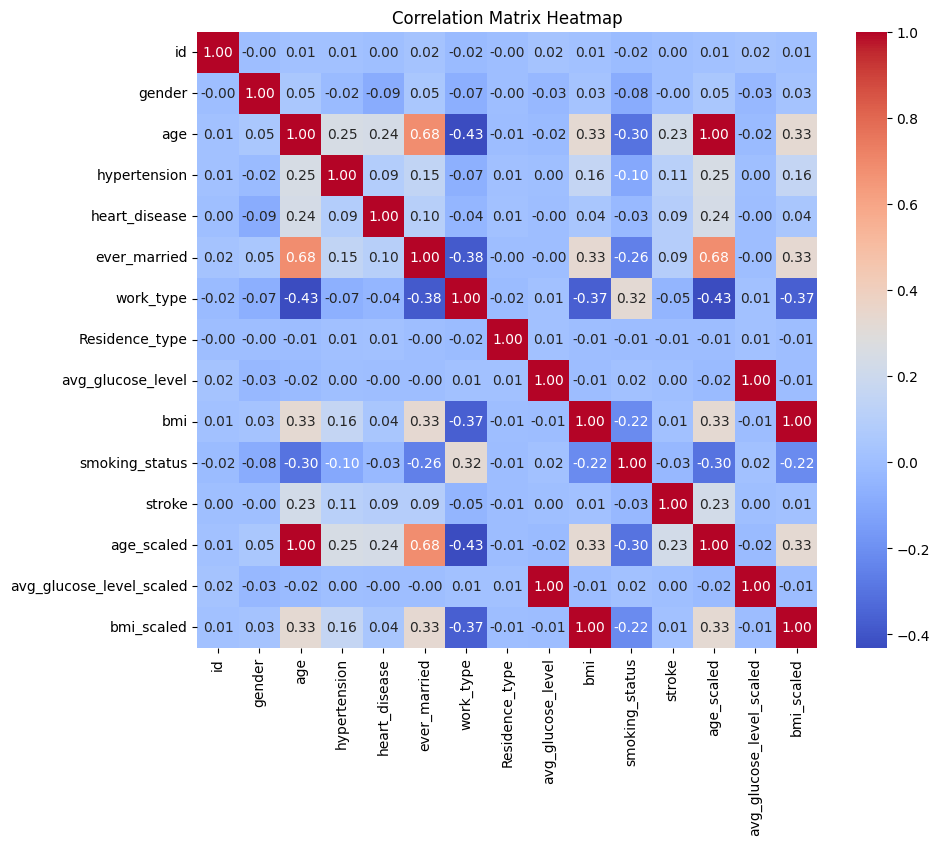

In [68]:
# Heatmap: Correlation analysis
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix Heatmap")
plt.show()

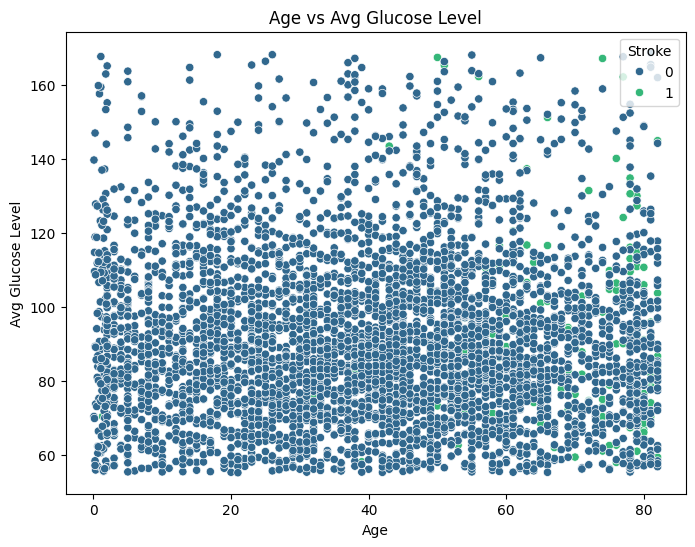

In [69]:
# Step 4: Exploring bivariate relationships
# Scatter plot: Age vs Avg Glucose Level
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='avg_glucose_level', hue='stroke', data=df, palette='viridis')
plt.title("Age vs Avg Glucose Level")
plt.xlabel("Age")
plt.ylabel("Avg Glucose Level")
plt.legend(title="Stroke")
plt.show()

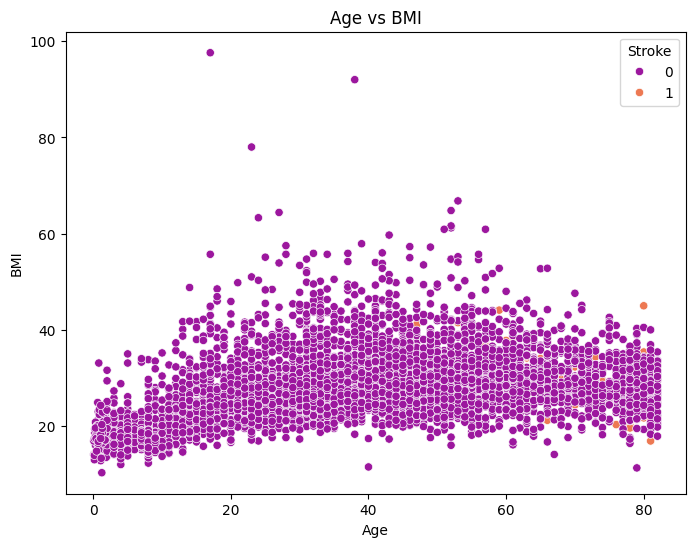

In [70]:
# Scatter plot: Age vs BMI
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='bmi', hue='stroke', data=df, palette='plasma')
plt.title("Age vs BMI")
plt.xlabel("Age")
plt.ylabel("BMI")
plt.legend(title="Stroke")
plt.show()

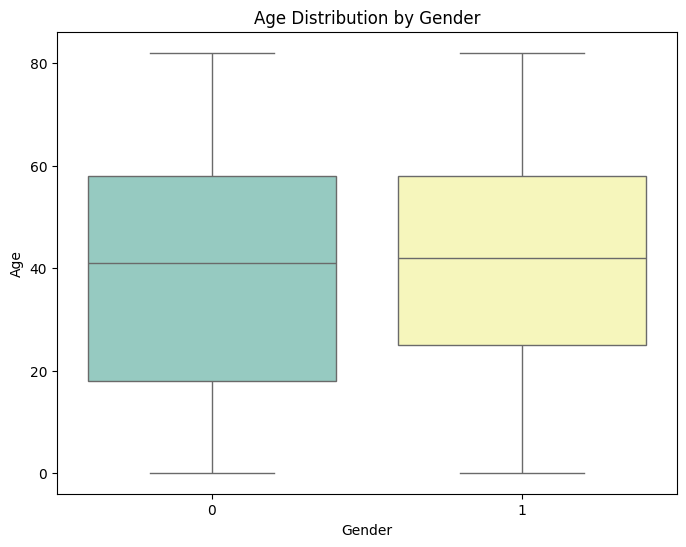

In [71]:
# Box plot: Distribution of Age by Gender
plt.figure(figsize=(8, 6))
sns.boxplot(x='gender', y='age', data=df, palette='Set3')
plt.title("Age Distribution by Gender")
plt.xlabel("Gender")
plt.ylabel("Age")
plt.show()

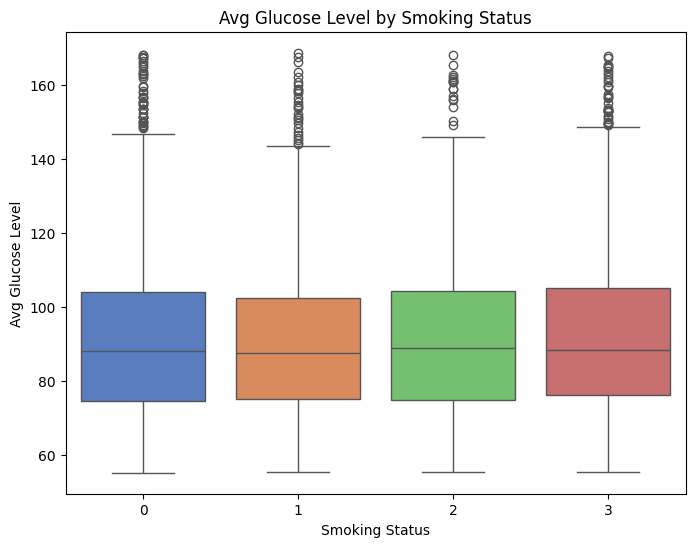

In [72]:
# Box plot: Avg Glucose Level by Smoking Status
plt.figure(figsize=(8, 6))
sns.boxplot(x='smoking_status', y='avg_glucose_level', data=df, palette='muted')
plt.title("Avg Glucose Level by Smoking Status")
plt.xlabel("Smoking Status")
plt.ylabel("Avg Glucose Level")
plt.show()

In [73]:
# Step 5: Extracting interesting patterns and facts
# Male to female ratio
male_count = df[df['gender'] == 0].shape[0]
female_count = df[df['gender'] == 1].shape[0]
print(f"Male Count: {male_count}, Female Count: {female_count}")

Male Count: 1817, Female Count: 2665


In [74]:
# Impact of smoking status on glucose levels
smoking_groups = df.groupby('smoking_status')['avg_glucose_level'].mean()
print("Average Glucose Level by Smoking Status:")
print(smoking_groups)

Average Glucose Level by Smoking Status:
smoking_status
0    91.256834
1    90.438589
2    91.850277
3    91.903657
Name: avg_glucose_level, dtype: float64
